# <center> Binary Prediction of Smoker Status using Bio-Signals   </center>
## <center> support with one upvote, thank you</center>
## <center>Created by Ashir Mehfooz </center>

# Table of Contents
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Features Data Visualization](#3)
- [4. Preprocessing](#4)
- [5. Target distribution](#5)
- [6. Feature engineering](#6)
- [7. Split Dataset](#7) 
- [8. VotingClassifier](#8) 
- [9. StackingClassifier](#9) 
- [10. Predict test data](#10)
- [11. Submission](#11)   

<a id="1"></a>
# **<center><span style="color:#000000;">Import Libraries</span></center>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin,clone,RegressorMixin
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew #for some statistics

<a id="2"></a>
# **<center><span style="color:#00000;">Read Dataset</span></center>**

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


<a id="3"></a>
# **<center><span style="color:#000000;">Features Data Visualization</span></center>**

In [4]:
train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

<Axes: xlabel='age', ylabel='count'>

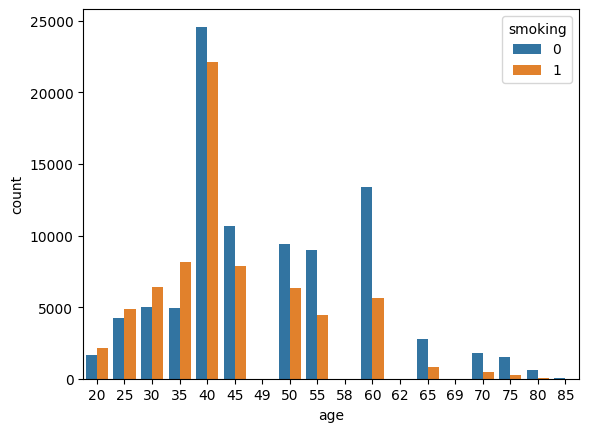

In [5]:
sns.countplot(data=train, x='age', hue='smoking')

<Axes: xlabel='height(cm)', ylabel='count'>

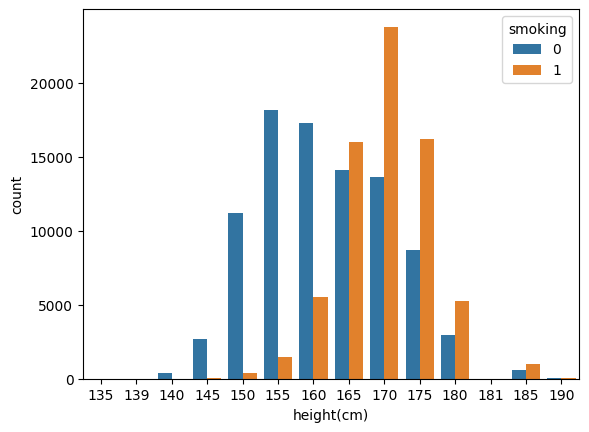

In [6]:
sns.countplot(data=train, x='height(cm)', hue='smoking')

<Axes: xlabel='weight(kg)', ylabel='count'>

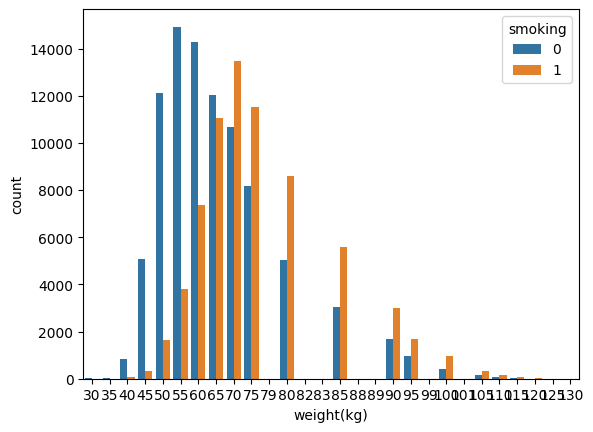

In [7]:
sns.countplot(data=train, x='weight(kg)', hue='smoking')

<Axes: xlabel='eyesight(left)', ylabel='count'>

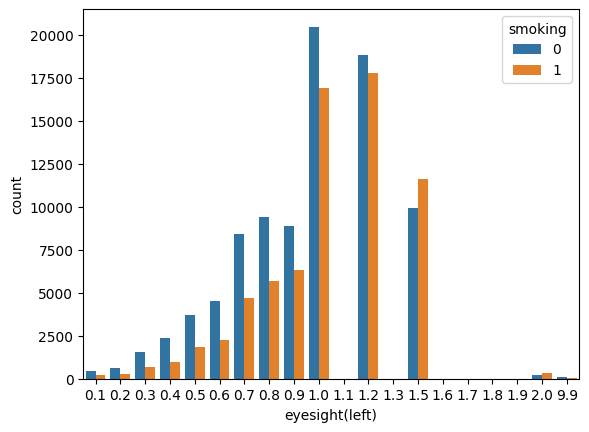

In [8]:
sns.countplot(data=train, x='eyesight(left)', hue='smoking')

<Axes: xlabel='eyesight(right)', ylabel='count'>

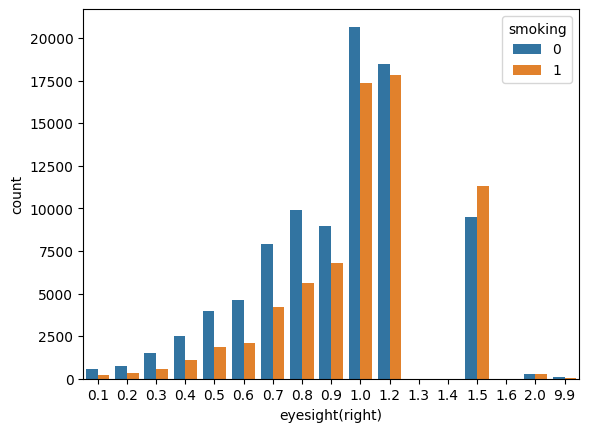

In [9]:
sns.countplot(data=train, x='eyesight(right)', hue='smoking')

<Axes: xlabel='hearing(left)', ylabel='count'>

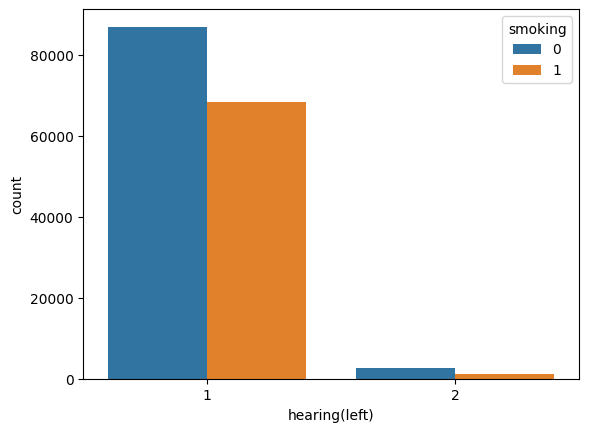

In [10]:
sns.countplot(data=train, x='hearing(left)', hue='smoking')

<Axes: xlabel='hearing(right)', ylabel='count'>

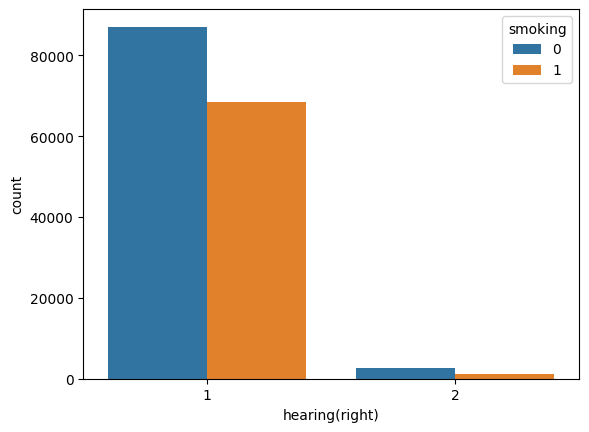

In [11]:
sns.countplot(data=train, x='hearing(right)', hue='smoking')

<Axes: xlabel='systolic', ylabel='Count'>

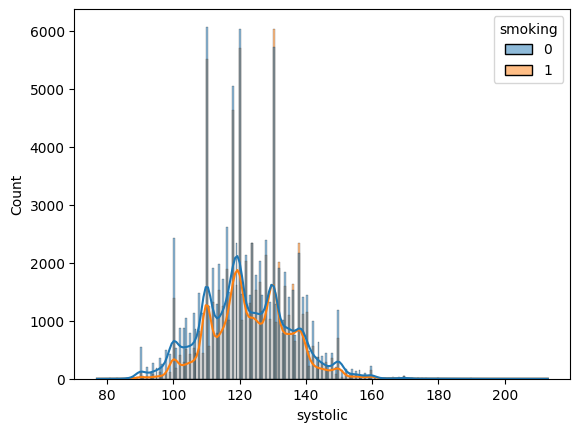

In [12]:

sns.histplot(train,x='systolic',hue='smoking',kde=True)

<Axes: xlabel='relaxation', ylabel='Count'>

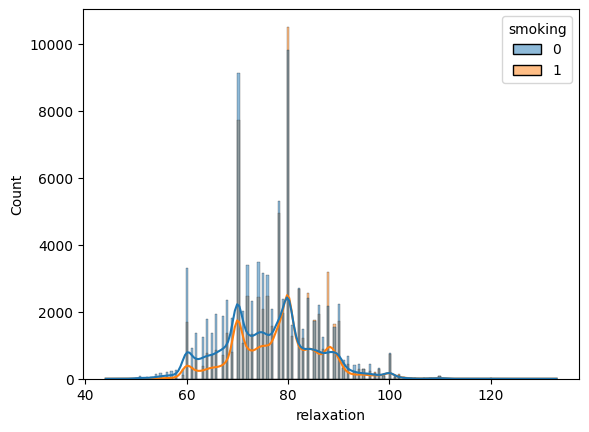

In [13]:
sns.histplot(train,x='relaxation',hue='smoking',kde=True)

<Axes: xlabel='fasting blood sugar', ylabel='Count'>

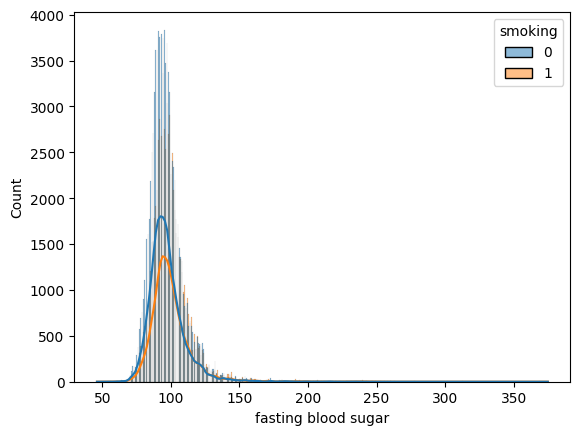

In [14]:
sns.histplot(train,x='fasting blood sugar',hue='smoking',kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

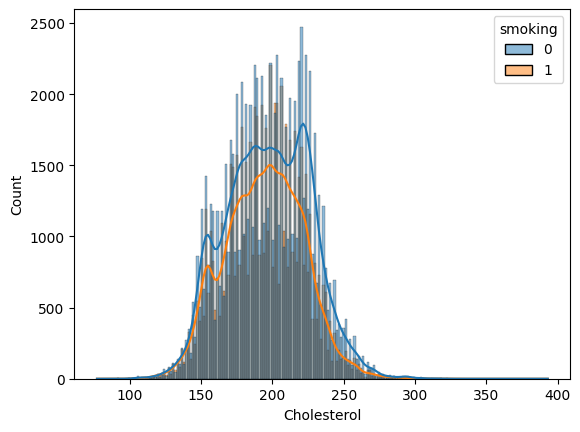

In [15]:
sns.histplot(train,x='Cholesterol',hue='smoking',kde=True)

<Axes: xlabel='triglyceride', ylabel='Count'>

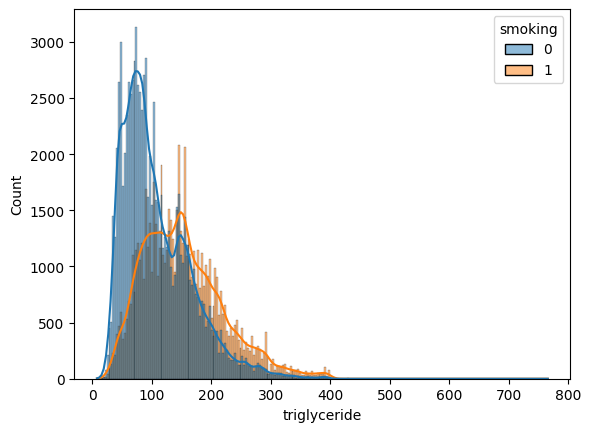

In [16]:
sns.histplot(train,x='triglyceride',hue='smoking',kde=True)

<Axes: xlabel='HDL', ylabel='Count'>

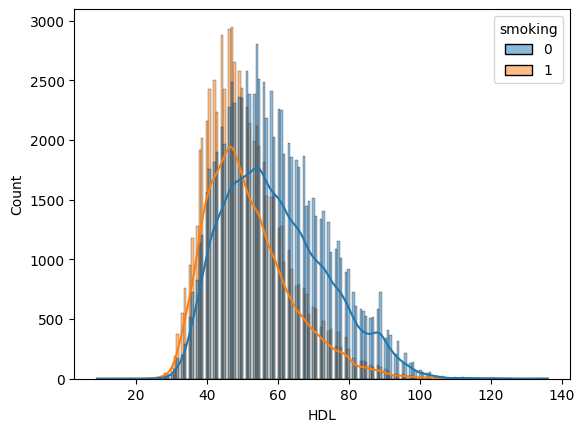

In [17]:
sns.histplot(train,x='HDL',hue='smoking',kde=True)

<Axes: xlabel='LDL', ylabel='Count'>

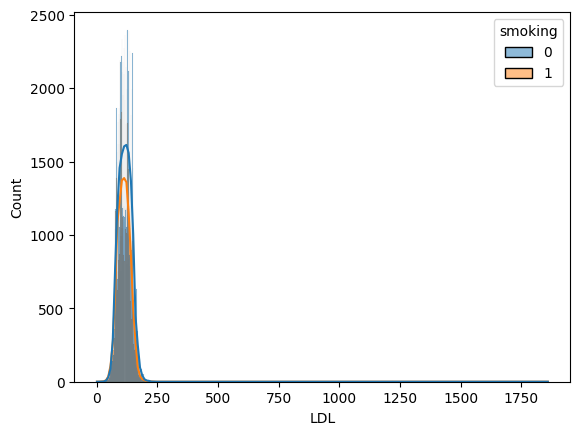

In [18]:
sns.histplot(train,x='LDL',hue='smoking',kde=True)

<Axes: xlabel='hemoglobin', ylabel='Count'>

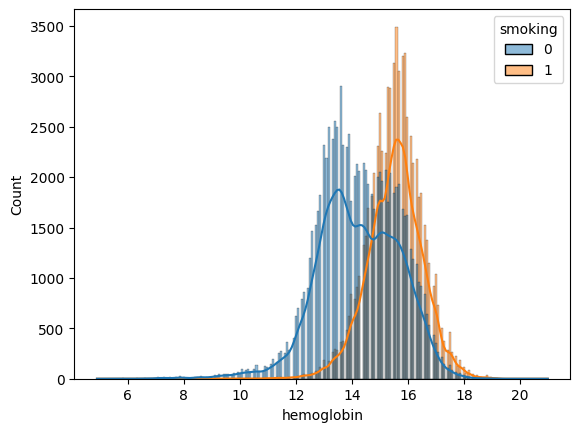

In [19]:
sns.histplot(train,x='hemoglobin',hue='smoking',kde=True)

<Axes: xlabel='Urine protein', ylabel='count'>

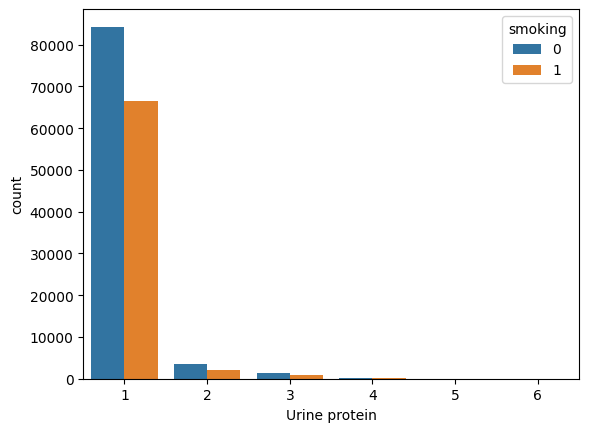

In [20]:
sns.countplot(data=train, x='Urine protein', hue='smoking')

<Axes: xlabel='serum creatinine', ylabel='Count'>

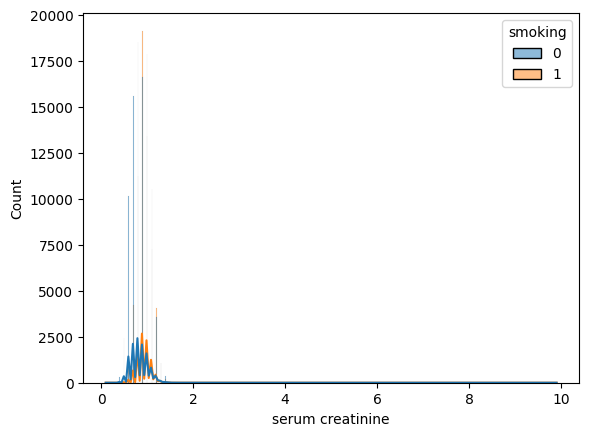

In [21]:
sns.histplot(train,x='serum creatinine',hue='smoking',kde=True)

<Axes: xlabel='AST', ylabel='Count'>

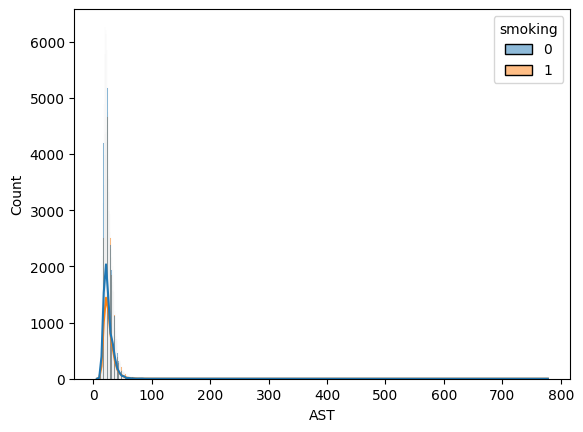

In [22]:
sns.histplot(train,x='AST',hue='smoking',kde=True)

<Axes: xlabel='ALT', ylabel='Count'>

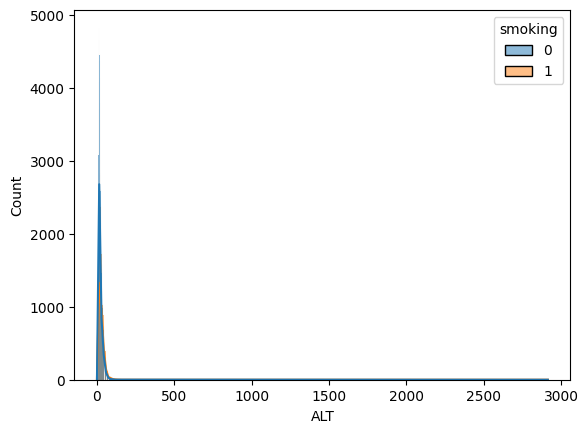

In [23]:
sns.histplot(train,x='ALT',hue='smoking',kde=True)

<Axes: xlabel='Gtp', ylabel='Count'>

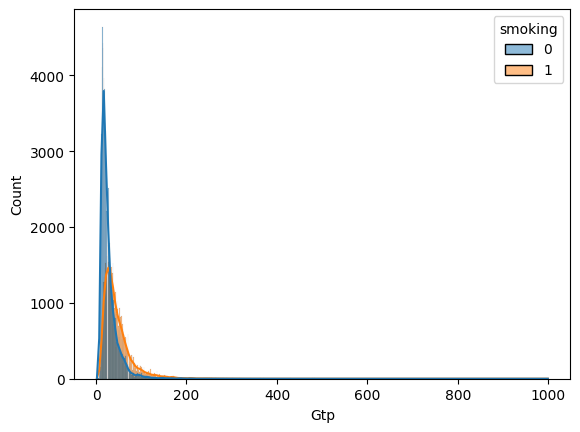

In [24]:
sns.histplot(train,x='Gtp',hue='smoking',kde=True)

<Axes: xlabel='dental caries', ylabel='count'>

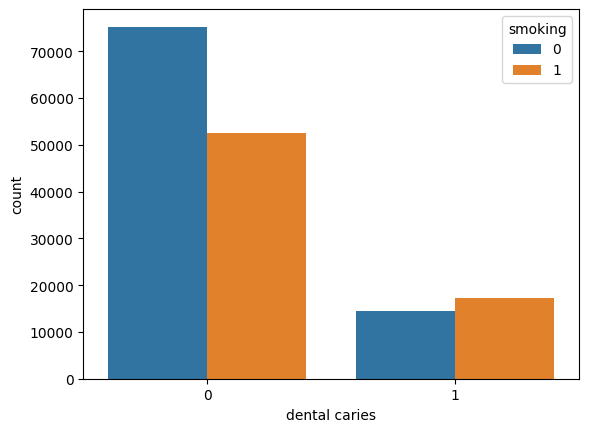

In [25]:
sns.countplot(data=train, x='dental caries', hue='smoking')

<a id="4"></a>
# **<center><span style="color:#0000000;">Preprocessing</span></center>**

In [26]:
train['hearing(left)'] = train['hearing(left)'].replace({' ':0,' ':1})
train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


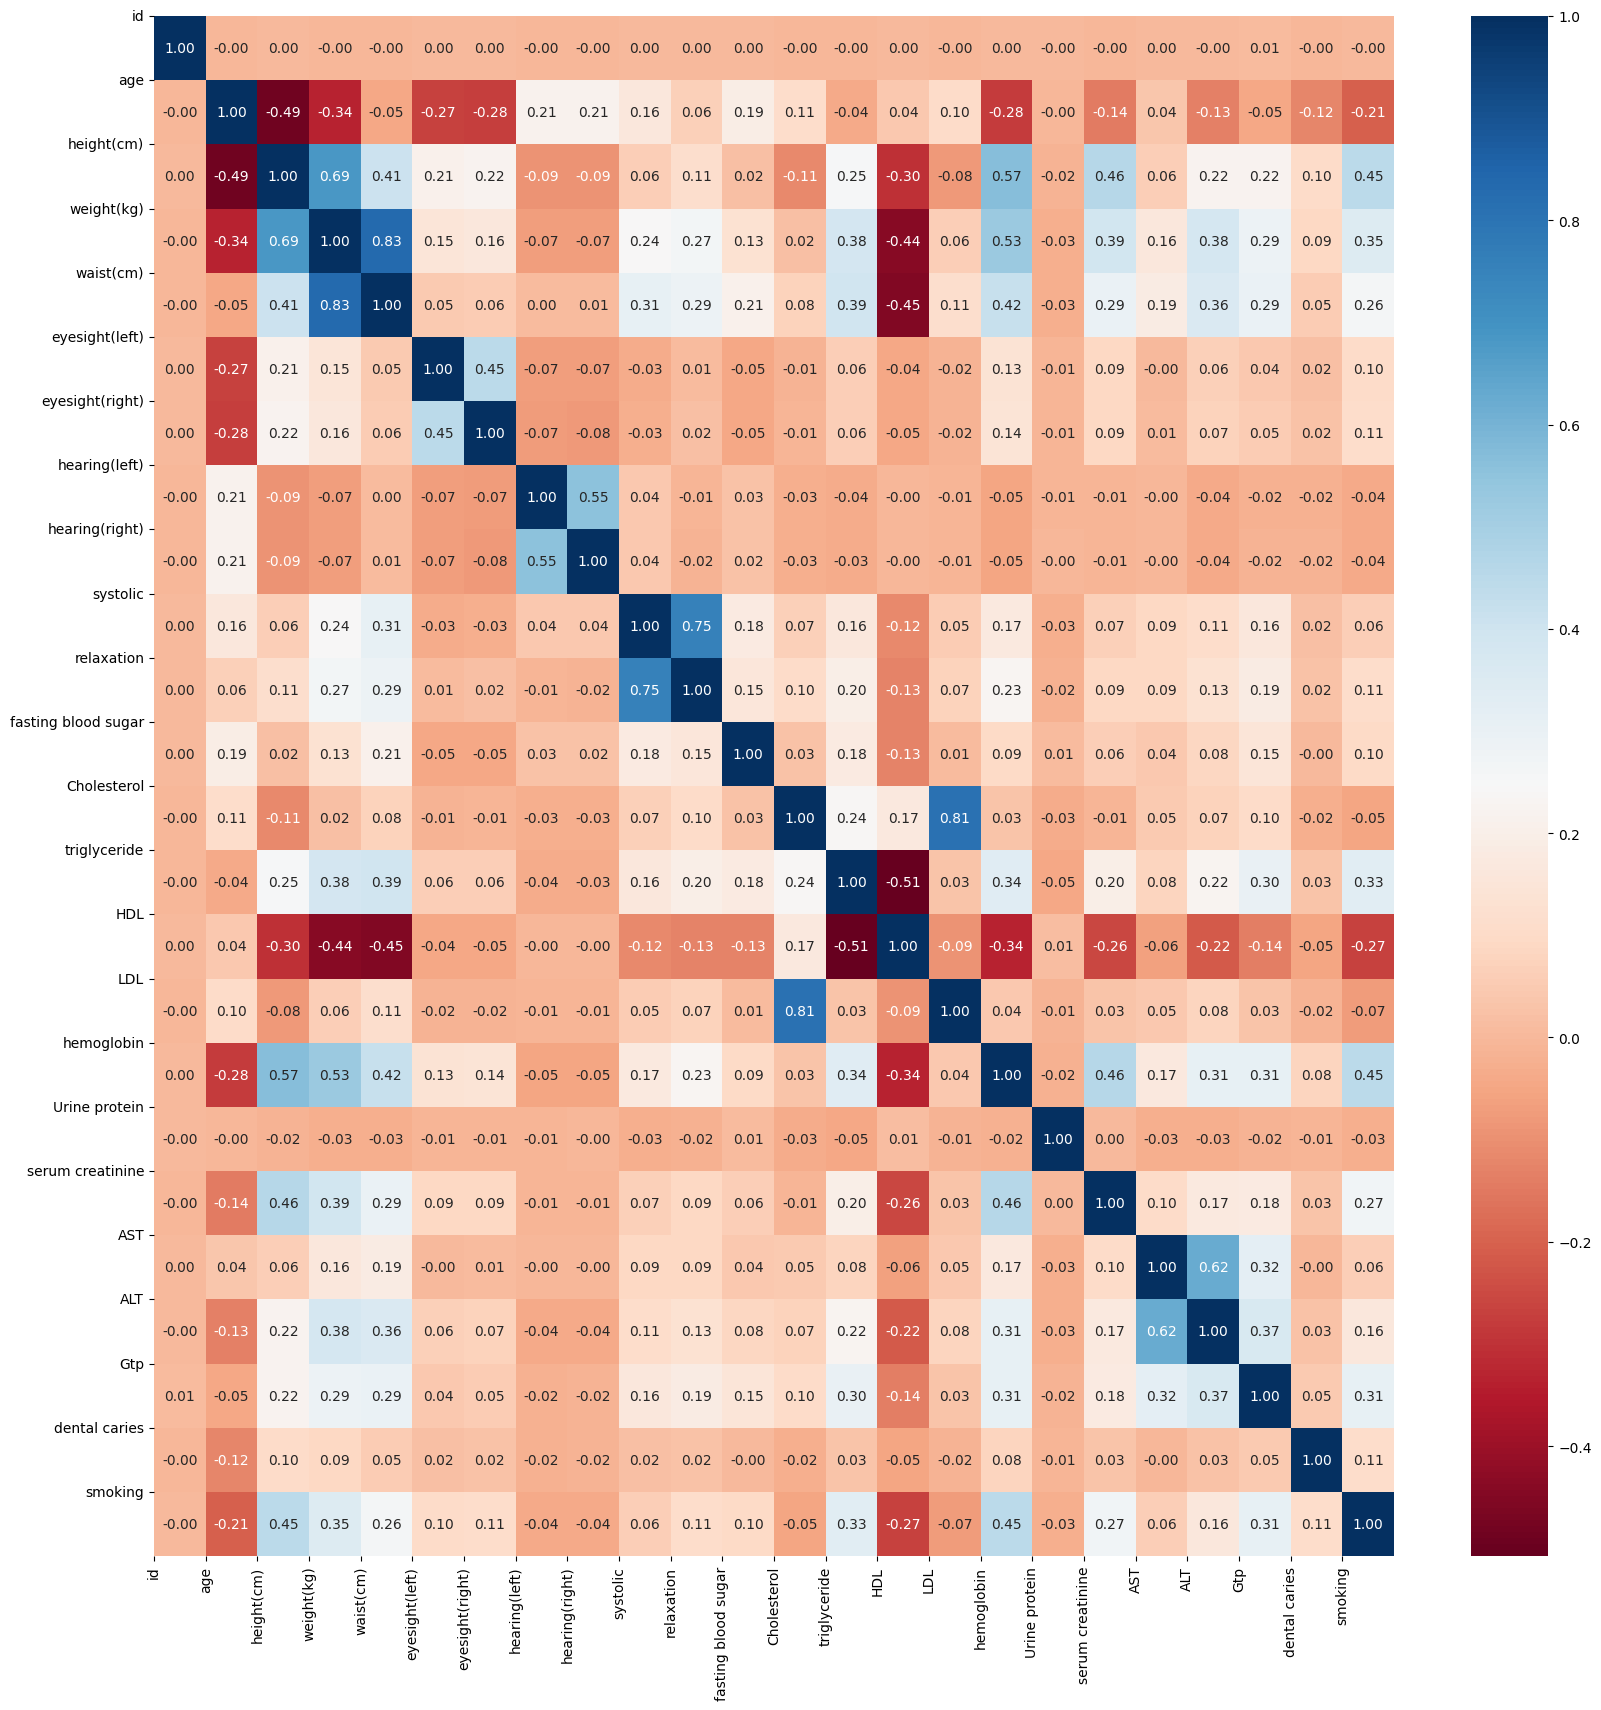

In [27]:
#Correlation Matrix with Heatmap
#method:pearson
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [28]:
train = train.drop(columns=['id'], axis = 1)
train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,55,80,14.4,1,1.1,22,17,37,0,1


In [29]:
X= train.drop(columns=["smoking"],axis=1)
y= train["smoking"]

<a id="5"></a>
# **<center><span style="color:#0000000;">Target distribution</span></center>**

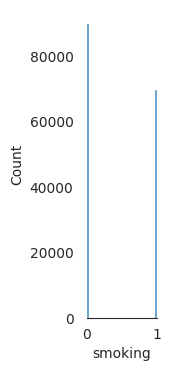

Skewness: 0.252532
Kurtosis: -1.936252


In [30]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(1, 4))
sns.histplot(train['smoking'])
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % train['smoking'].skew())
print("Kurtosis: %f" % train['smoking'].kurt())

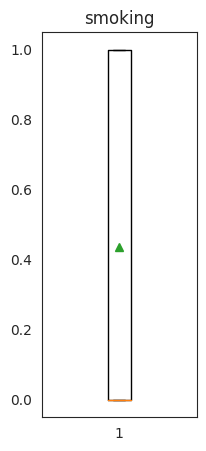

In [31]:
plt.figure(figsize=(2,5))
plt.boxplot(train['smoking'],showmeans=True)
plt.title('smoking')
plt.show()

In [32]:
from collections import Counter
print(Counter(y))
print(X.shape)

Counter({0: 89603, 1: 69653})
(159256, 22)


<a id="6"></a>
# **<center><span style="color:#00000;">Feature engineering</span></center>**

In [33]:
X_train=X
y_train=y

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.902985,-0.030268,-0.567581,-0.223489,-1.257856,-1.022156,-0.156725,-0.154865,0.981702,1.125777,...,2.604429,-1.135246,-1.406581,1.189928,-0.213401,0.597927,-0.371570,-0.087326,-0.295342,-0.496866
1,2.169636,-0.030268,-0.170319,0.669577,-1.009169,-0.767247,6.380587,6.457242,1.845852,0.681066,...,-1.097105,0.082162,0.404573,0.980315,-0.213401,1.155511,0.156700,-0.199983,0.025124,2.012614
2,-2.052535,0.536694,0.624205,-0.223489,-1.506543,-1.277064,-0.156725,-0.154865,-0.353802,-0.208355,...,1.048274,-0.777185,-0.767350,1.818767,-0.213401,-0.517239,0.156700,0.250645,0.537870,-0.496866
3,-0.785883,1.670617,2.213252,2.455708,1.229017,0.507296,-0.156725,-0.154865,0.667465,1.236955,...,1.138923,-1.278470,-0.447734,0.770702,-0.213401,0.597927,-0.582878,0.025331,-0.199202,2.012614
4,-1.208100,-0.030268,-0.567581,-0.279305,1.229017,-0.002521,-0.156725,-0.154865,-0.118125,-0.097177,...,-0.613639,-0.848797,-0.767350,0.421347,-0.213401,-0.517239,-0.688532,-0.763267,-0.615808,-0.496866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,-0.363666,-1.164191,-1.759366,-1.563087,1.229017,2.546566,-0.156725,-0.154865,0.353229,0.347533,...,-1.217971,1.156345,1.576497,-0.207493,-0.213401,-0.517239,-0.054608,-0.030997,-0.743994,-0.496866
159252,0.480768,-1.164191,0.624205,-0.111855,-0.014419,-0.002521,-0.156725,-0.154865,-0.196684,0.347533,...,1.123815,0.583447,-0.234657,-0.207493,-0.213401,-1.632406,-0.477224,-0.368968,-0.583761,-0.496866
159253,-0.363666,-0.597229,-1.362104,-1.897986,1.229017,-0.002521,-0.156725,-0.154865,-0.668039,-0.764243,...,-1.248188,2.230528,-0.767350,-2.722849,-0.213401,-1.632406,-1.111148,-0.988581,-0.776041,-0.496866
159254,0.480768,-0.030268,0.624205,1.004477,0.482955,-0.002521,-0.156725,-0.154865,-0.118125,1.459310,...,0.307967,-0.061063,-1.229016,-0.277364,-0.213401,1.155511,-0.371570,-0.537954,0.025124,-0.496866


<a id="7"></a>
# **<center><span style="color:#0000000;">VotingRegressor</span></center>**

In [34]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge,BayesianRidge,ElasticNet,Lasso,LassoLars,Lars
from sklearn.linear_model import HuberRegressor,OrthogonalMatchingPursuit,PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor()
reg2 = LGBMRegressor()
reg3 = BaggingRegressor(n_estimators=10)
reg4 = AdaBoostRegressor()
reg5 = XGBRegressor(n_estimators=10,max_depth=6,objective='reg:squarederror')
reg6 = RandomForestRegressor(n_estimators=10)
reg7 = ExtraTreesRegressor(n_estimators=10)
reg8 = LinearRegression()
reg9 = Ridge()
reg10 = BayesianRidge()
reg11 = ElasticNet()
reg12 = Lasso()
reg13 = Lars()
reg14 = HuberRegressor()
reg15 = KNeighborsRegressor()
reg16 = OrthogonalMatchingPursuit()
reg17 = DummyRegressor()
reg18 = DecisionTreeRegressor()
reg19 = CatBoostRegressor(logging_level='Silent')

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)
reg7.fit(X_train, y_train)
reg8.fit(X_train, y_train)
reg9.fit(X_train, y_train)
reg10.fit(X_train, y_train)
reg11.fit(X_train, y_train)
reg12.fit(X_train, y_train)
reg13.fit(X_train, y_train)
reg14.fit(X_train, y_train)
reg15.fit(X_train, y_train)
reg16.fit(X_train, y_train)
reg17.fit(X_train, y_train)
reg18.fit(X_train, y_train)
reg19.fit(X_train, y_train)

voting_model = VotingRegressor([("gb", reg1), ("lbgm", reg2), ("bag", reg3), ("ada", reg4), ("xgb", reg5), ("rf", reg6), ("et", reg7),
                        ("ln", reg8), ("ridge", reg9), ("bay", reg10), ("en", reg11), ("lasso", reg12), ("lars", reg13),
                        ("hub", reg14), ("knn", reg15), ("or", reg16), ("dummy", reg17), ("dt", reg18), ("cat", reg19)])

voting_model.fit(X_train, y_train)


VotingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                            ('lbgm', LGBMRegressor()),
                            ('bag', BaggingRegressor()),
                            ('ada', AdaBoostRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature...
                            ('et', ExtraTreesRegressor(n_estimators=10)),
                            ('ln', LinearRegression()), ('ridge', Ridge()),
                            ('bay', BayesianRidge()), ('en', ElasticNet()),
                            ('lasso', Lasso()), ('lars', Lars()),
                            ('hub', HuberRegressor()),
                            ('knn', KNeighborsRegressor()),
                            ('or', OrthogonalMatchingPursuit()),
                            ('dummy', DummyRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x7c59237f4250>)])

<a id="8"></a>
# **<center><span style="color:#000000;">StackingRegressor</span></center>**

In [35]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=2024).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

averaged_models = AveragingModels(models = (reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,reg12,reg13,reg14,
                                            reg15,reg16,reg17,reg18,reg19))


In [36]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=1506)

        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [37]:
stacked_averaged_models = StackingAveragedModels(base_models = (reg1,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,
                                                                reg12,reg13,reg14,reg15,reg16,reg17,reg18,reg19),meta_model = reg2) 
stacking_model=stacked_averaged_models.fit(X_train.values, y_train.values)

<a id="9"></a>
# **<center><span style="color:#00000;">Predict test data</span></center>**

In [38]:
import_test0 = test.reset_index(drop=True)
import_test = import_test0.drop(columns=['id'],axis=1)
import_test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,40,165,60,78.0,0.8,0.9,1,1,112,78,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,40,170,85,95.0,1.2,1.2,1,1,130,90,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,35,170,85,89.0,1.2,1.2,1,1,131,86,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,40,160,60,67.0,0.7,0.8,1,1,120,80,...,81,55,103,13.9,1,0.6,42,36,32,0


In [39]:
test_row = import_test.shape[0]
test_row 

106171

In [40]:
import_train = X.reset_index(drop=True)
import_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,300,40,75,16.5,1,1.0,22,25,27,0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,55,57,126,16.2,1,1.1,27,23,37,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,197,45,93,17.4,1,0.8,27,31,53,0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,203,38,102,15.9,1,1.0,20,27,30,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,87,44,93,15.4,1,0.8,19,13,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,47,72,159,14.5,1,0.8,25,26,13,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,202,64,108,14.5,1,0.6,21,20,18,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,45,87,93,10.9,1,0.6,15,9,12,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,148,55,80,14.4,1,1.1,22,17,37,0


In [41]:
Row_Number=test_row 
X_test_target1_df=import_train._append(import_test,ignore_index=True)

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
X_test_target1_df = StandardScaler.fit_transform(X_test_target1_df)
test_pred_target0= pd.DataFrame(X_test_target1_df)
test_pred_target0 = pd.DataFrame(test_pred_target0).tail(Row_Number)#tail:抓取後面資料
test_pred_target0

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
159256,-0.367031,-0.028176,0.227514,0.111561,0.486103,0.512234,-0.157049,-0.155620,0.589123,1.349053,...,0.882477,-0.492215,0.014322,-0.415738,-0.213468,0.040963,-0.689184,-0.087290,-0.133927,-0.495278
159257,3.004411,-0.594671,-0.567001,1.116770,-0.013462,-0.000992,6.367446,6.425915,1.687698,-0.538932,...,0.459863,-1.493738,-0.383091,-1.253468,-0.213468,1.154685,-0.583707,-0.816410,-0.391209,-0.495278
159258,1.318690,0.538319,0.227514,0.390786,-1.012592,-0.770830,-0.157049,-0.155620,-0.430983,-0.205758,...,0.686264,-1.207589,-0.961146,0.421992,-0.213468,2.825267,1.314884,1.875727,-0.005286,-0.495278
159259,-0.367031,-0.594671,-1.361515,-1.787166,-1.761939,-1.540668,-0.157049,-0.155620,-0.509453,-1.649512,...,-1.215501,1.367757,0.483992,-0.206306,-0.213468,-1.629619,-0.056320,-0.479893,-0.841452,2.019069
159260,-0.367031,0.538319,0.624771,0.714687,-0.013462,-0.257605,-0.157049,-0.155620,0.746062,1.904342,...,-0.415552,-1.207589,0.303350,1.189911,-0.213468,0.597824,0.471066,0.697917,-0.294728,2.019069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265422,-0.367031,-0.028176,-0.567001,-0.558578,-0.513027,-0.257605,-0.157049,-0.155620,-0.823331,0.127415,...,-0.687233,0.223159,1.242689,1.120100,-0.213468,1.154685,-0.161798,0.249227,-0.262568,-0.495278
265423,-0.367031,0.538319,1.419285,1.340150,0.486103,0.512234,-0.157049,-0.155620,0.589123,1.460111,...,0.882477,-0.849902,-0.527604,0.840857,2.684603,0.597824,-0.056320,0.249227,0.059035,-0.495278
265424,-0.788462,0.538319,1.419285,0.670011,0.486103,0.512234,-0.157049,-0.155620,0.667592,1.015879,...,-0.777793,-0.206065,0.989790,0.771046,-0.213468,-0.515898,0.787498,0.305314,-0.391209,2.019069
265425,-0.367031,-0.594671,-0.567001,-1.787166,-0.762809,-0.514217,-0.157049,-0.155620,-0.195574,0.349531,...,-0.702326,-0.062990,-0.419219,-0.625170,-0.213468,-1.629619,1.736794,0.529658,-0.133927,-0.495278


In [42]:
#predict test
Stacking_predict=stacking_model.predict(test_pred_target0.values)
Voting_predict=voting_model.predict(test_pred_target0)

In [43]:
#DataFrame
Stacking_predict_df=pd.DataFrame(Stacking_predict)
Voting_predict_df=pd.DataFrame(Voting_predict)

#rename lable
Stacking_predict_df=Stacking_predict_df.set_axis(axis=1,labels=['Stack_pred'])
Voting_predict_df=Voting_predict_df.set_axis(axis=1,labels=['Voting_pred'])

#merge predict
test_pred=import_test0.merge(Voting_predict_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(Stacking_predict_df,how='inner',left_index=True,right_index=True)
test_pred


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,Voting_pred,Stack_pred
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,115,14.2,1,0.9,19,25,32,0,0.534690,0.642910
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,104,13.0,1,1.1,20,12,24,0,0.332514,0.385865
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,88,15.4,1,1.4,38,60,36,0,0.513193,0.373152
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,128,14.5,1,0.6,25,18,10,1,0.153796,0.032040
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,123,16.5,1,1.0,30,39,27,1,0.572885,0.548606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,149,16.4,1,1.1,24,31,28,0,0.537528,0.675271
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,100,16.0,2,1.0,25,31,38,0,0.541151,0.591779
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,142,15.9,1,0.8,33,32,24,1,0.452585,0.372288
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,103,13.9,1,0.6,42,36,32,0,0.184891,0.097749


<a id="10"></a>
# **<center><span style="color:#00000;">Predict test data</span></center>**

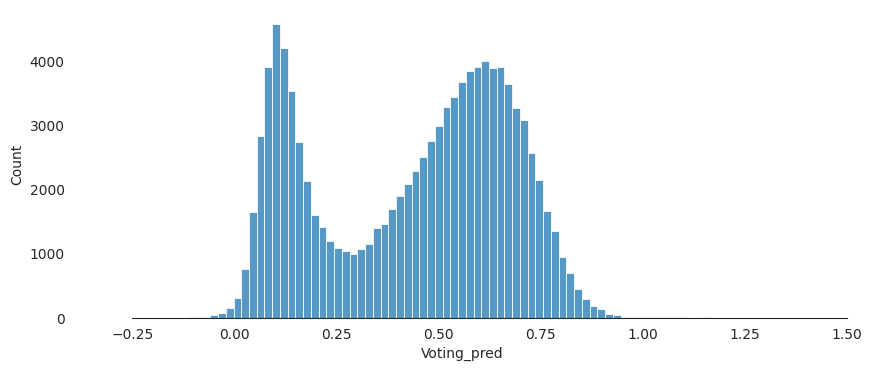

Skewness: -0.255903
Kurtosis: -1.233629


In [44]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 4))
sns.histplot(test_pred['Voting_pred'])
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % test_pred['Voting_pred'].skew())
print("Kurtosis: %f" % test_pred['Voting_pred'].kurt())

In [45]:
test_pred['Voting_pred'][test_pred['Voting_pred'] <= 0] = 0
test_pred['Voting_pred']

/tmp/ipykernel_20/3146761836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pred['Voting_pred'][test_pred['Voting_pred'] <= 0] = 0


0         0.534690
1         0.332514
2         0.513193
3         0.153796
4         0.572885
            ...   
106166    0.537528
106167    0.541151
106168    0.452585
106169    0.184891
106170    0.129133
Name: Voting_pred, Length: 106171, dtype: float64

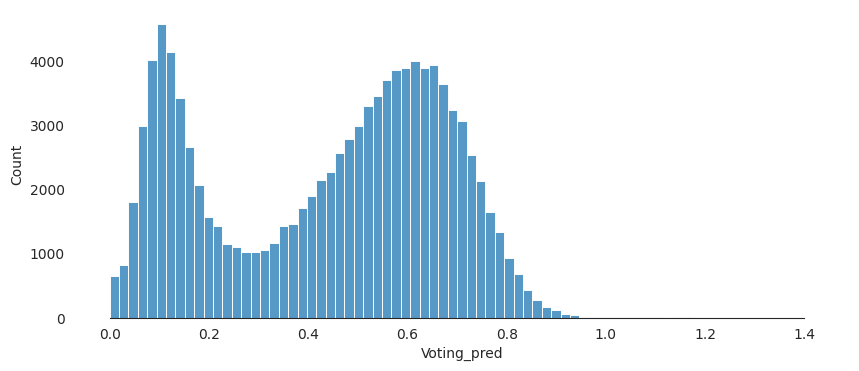

Skewness: -0.253652
Kurtosis: -1.238733


In [46]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 4))
sns.histplot(test_pred['Voting_pred'])
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % test_pred['Voting_pred'].skew())
print("Kurtosis: %f" % test_pred['Voting_pred'].kurt())

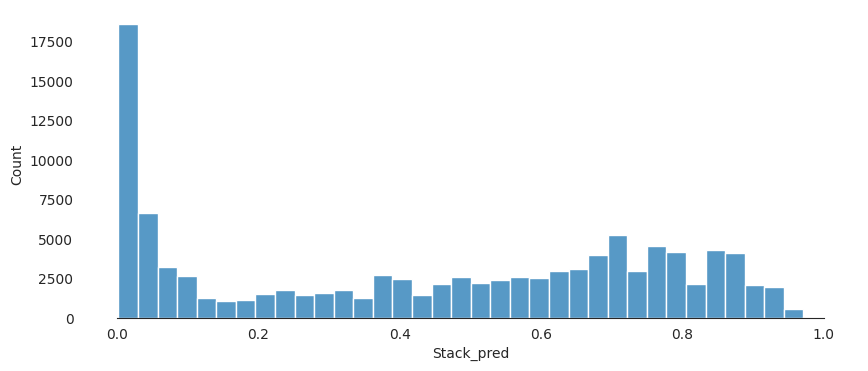

Skewness: -0.090568
Kurtosis: -1.499625


In [47]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 4))
sns.histplot(test_pred['Stack_pred'])
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % test_pred['Stack_pred'].skew())
print("Kurtosis: %f" % test_pred['Stack_pred'].kurt())

In [48]:
test_pred['Stack_pred'][test_pred['Stack_pred'] <= 0] = 0
test_pred['Stack_pred']

/tmp/ipykernel_20/3454492703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pred['Stack_pred'][test_pred['Stack_pred'] <= 0] = 0


0         0.642910
1         0.385865
2         0.373152
3         0.032040
4         0.548606
            ...   
106166    0.675271
106167    0.591779
106168    0.372288
106169    0.097749
106170    0.030623
Name: Stack_pred, Length: 106171, dtype: float64

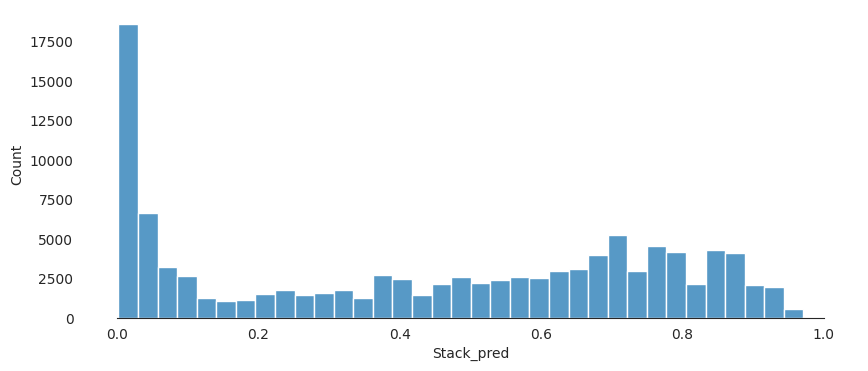

Skewness: -0.090568
Kurtosis: -1.499625


In [49]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 4))
sns.histplot(test_pred['Stack_pred'])
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % test_pred['Stack_pred'].skew())
print("Kurtosis: %f" % test_pred['Stack_pred'].kurt())

<a id="11"></a>
# **<center><span style="color:#00000;">Submission</span></center>**

In [50]:
submission=test_pred[['id','Stack_pred']]
submission=submission.rename(columns={'Stack_pred':'smoking'})
submission

,id,smoking
0,159256,0.642910
1,159257,0.385865
2,159258,0.373152
3,159259,0.032040
4,159260,0.548606
...,...,...
106166,265422,0.675271
106167,265423,0.591779
106168,265424,0.372288
106169,265425,0.097749


In [51]:
submission.to_csv('submission.csv', index=False)